In [46]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [47]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [48]:
%%R

# My commonly used R imports

require('tidyverse')

In [49]:
%%R

#Import the csv file 311_Dogs_Data.csv
df <- read.csv('311_processed.csv')

#Show the first few rows of the dataframe
head(df)


  Unique.Key           Created.Date            Closed.Date Agency
1   59892199 12/31/2023 11:38:00 PM 01/05/2024 07:45:00 AM    DEP
2   59889491 12/31/2023 11:17:00 PM 01/05/2024 07:30:00 AM    DEP
3   59893098 12/31/2023 11:08:00 PM 01/05/2024 07:32:00 AM    DEP
4   59886784 12/31/2023 10:53:00 PM 01/03/2024 09:24:00 AM    DEP
5   59887730 12/31/2023 10:38:00 PM 01/11/2024 08:56:00 AM    DEP
6   59890331 12/31/2023 10:26:00 PM 01/17/2024 08:45:00 PM    DEP
                             Agency.Name Complaint.Type
1 Department of Environmental Protection          Noise
2 Department of Environmental Protection          Noise
3 Department of Environmental Protection          Noise
4 Department of Environmental Protection          Noise
5 Department of Environmental Protection          Noise
6 Department of Environmental Protection          Noise
                Descriptor Location.Type Incident.Zip          Incident.Address
1 Noise, Barking Dog (NR5)            NA        10011      200 WES

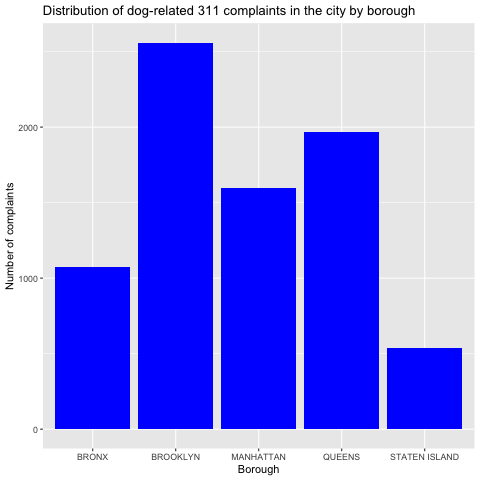

In [50]:
%%R

# Hypothesis 1: The number of dog-related 311 complaints in the city is the same in all the boroughs
# Null Hypothesis: The number of dog-related 311 complaints in the city is the same in all the boroughs
# Alternative Hypothesis: The number of dog-related 311 complaints in the city is not the same in all the boroughs

# Plot the distribution of dog-related 311 complaints in the city by borough
df %>%
  ggplot(aes(Borough)) +
  geom_bar(fill = 'blue') +
  labs(title = 'Distribution of dog-related 311 complaints in the city by borough',
       x = 'Borough',
       y = 'Number of complaints')
       

In [51]:
%%R

# Run a chi-squared test to determine if the number of dog-related 311 complaints in the city is the same in all the boroughs
chisq.test(table(df$Borough))



	Chi-squared test for given probabilities

data:  table(df$Borough)
X-squared = 1581.2, df = 4, p-value < 2.2e-16



In [52]:
%%R

# The results of the chi-squared test indicate that the number of dog-related 311 complaints in the city is not the same in all the boroughs (p-value < 0.05). This suggests that there is a significant difference in the number of complaints across the boroughs.

NULL


In [69]:
%%R

# Hypothesis 2: 

#Null Hypothesis (H0): There is no significant difference in the average volume of noise complaints related to barking dogs between weekdays and weekends.

#Alternative Hypothesis (H1): There is a significant difference in the average volume of noise complaints related to barking dogs between weekdays and weekends.

library(dplyr)
library(lubridate)

# Step 1: Read the dataset
data <- read.csv('311_processed_modified.csv')

# Step 2: Parse the 'Created_Date' column
data$Created_Date <- mdy_hms(data$Created_Date)

# Step 3: Create a weekday/weekend indicator
data$DayType <- ifelse(wday(data$Created_Date) %in% c(1, 7), 'Weekend', 'Weekday')

# Step 4: Prepare data for t-test
# Aggregate complaints by DayType for each unique day
daily_counts <- data %>%
  group_by(DayType, Date = as.Date(Created_Date)) %>%
  summarise(Complaints = n(), .groups = 'drop')

# Separate data into weekday and weekend
weekday_complaints <- filter(daily_counts, DayType == 'Weekday')$Complaints
weekend_complaints <- filter(daily_counts, DayType == 'Weekend')$Complaints

# Perform a t-test
t_test_result <- t.test(weekday_complaints, weekend_complaints, alternative = "two.sided")

# Print the result
print(t_test_result)



	Welch Two Sample t-test

data:  weekday_complaints and weekend_complaints
t = 2.5699, df = 211.41, p-value = 0.01086
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.4195516 3.1826462
sample estimates:
mean of x mean of y 
 21.71538  19.91429 



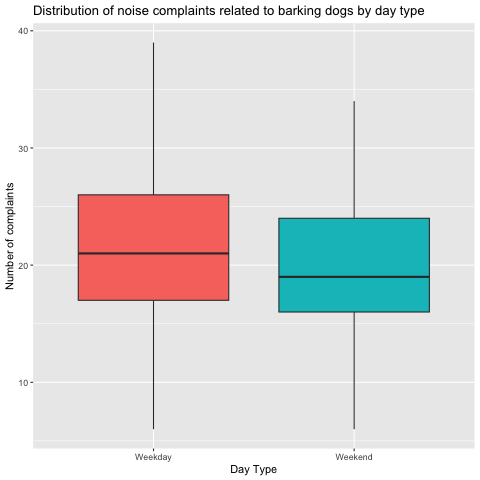

In [70]:
%%R

# Plot the distribution of noise complaints related to barking dogs by day type
daily_counts %>%
  ggplot(aes(DayType, Complaints, fill = DayType)) +
  geom_boxplot() +
  labs(title = 'Distribution of noise complaints related to barking dogs by day type',
       x = 'Day Type',
       y = 'Number of complaints') +
  theme(legend.position = 'none')

  

In [72]:
%%R

#The result of the t-test indicates that there is a significant difference in the average volume of noise complaints related to barking dogs between weekdays and weekends (p-value < 0.05). This suggests that the number of complaints is higher on weekdays compared to weekends.

NULL
